In [1]:
import pandas as pd
from datetime import datetime

In [2]:
data = pd.read_csv('C:\\Users\\user\\Documents\\datasets\\TSLA.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
data = data.set_index('Date')

Simple moving average(The purpose of this is to smoothening the curve)

<AxesSubplot:xlabel='Date'>

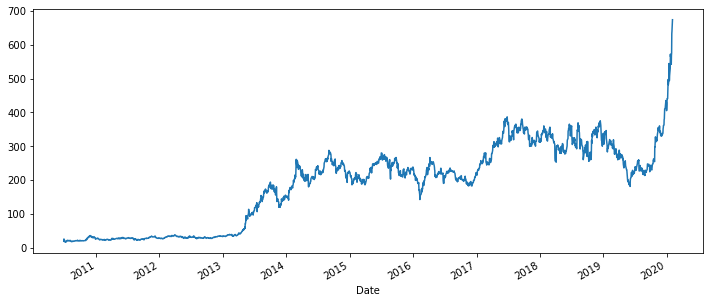

In [6]:
data['Open'].plot(figsize=(12,5))

In [7]:
data['Open:10 days rolling'] = data['Open'].rolling(window=10, min_periods=5).mean()

In [8]:
data['Open:10 days rolling']

Date
2010-06-29           NaN
2010-06-30           NaN
2010-07-01           NaN
2010-07-02           NaN
2010-07-06     22.558000
                 ...    
2020-01-28    542.288000
2020-01-29    545.431000
2020-01-30    555.696997
2020-01-31    570.321997
2020-02-03    586.929999
Name: Open:10 days rolling, Length: 2416, dtype: float64

In [9]:
data

,Open,High,Low,Close,Adj Close,Volume,Open:10 days rolling
Date,,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,NaN
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,NaN
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,NaN
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,NaN
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,22.558000
...,...,...,...,...,...,...,...
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,542.288000
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,545.431000
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,555.696997


<AxesSubplot:xlabel='Date'>

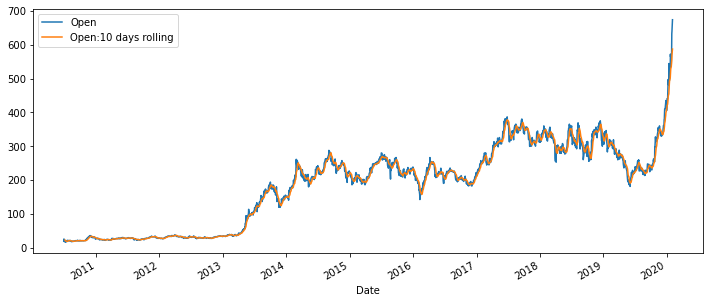

In [10]:
data[['Open' ,'Open:10 days rolling']].plot(figsize=(12,5))

In [11]:
data['Open:10 days rolling'] = data['Open'].rolling(window=10, min_periods=5).mean()
data['Open:20 days rolling'] = data['Open'].rolling(window=20, min_periods=5).mean()
data['Open:60 days rolling'] = data['Open'].rolling(window=50, min_periods=5).mean()

<AxesSubplot:xlabel='Date'>

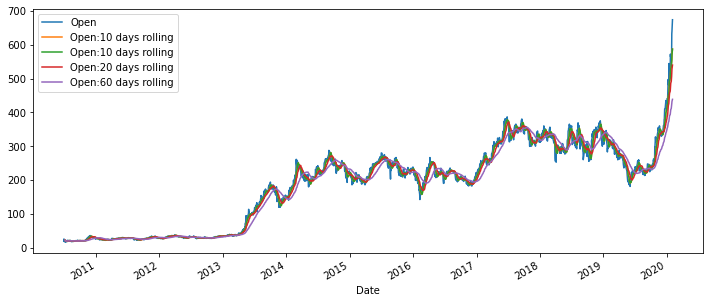

In [12]:
data[['Open' ,'Open:10 days rolling','Open:10 days rolling','Open:20 days rolling','Open:60 days rolling']].plot(figsize=(12,5))

<AxesSubplot:xlabel='Date'>

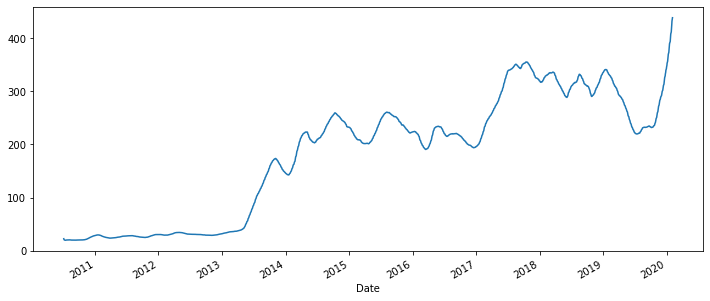

In [13]:
data['Open:60 days rolling'].plot(figsize=(12,5))

Cumulative moving average (CMA) , we use expanding

<AxesSubplot:xlabel='Date'>

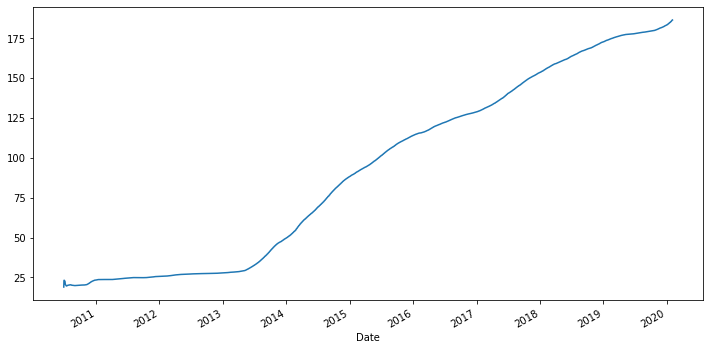

In [14]:
data['Open'].expanding().mean().plot(figsize=(12,6))

In [15]:
data['Open'].expanding().mean().head()

Date
2010-06-29    19.000000
2010-06-30    22.395001
2010-07-01    23.263334
2010-07-02    23.197500
2010-07-06    22.558000
Name: Open, dtype: float64

Exponential weighted moving average EMA

In [16]:
data['EMA_0.1'] = data['Open'].ewm(alpha=0.1,adjust=False).mean()

<AxesSubplot:xlabel='Date'>

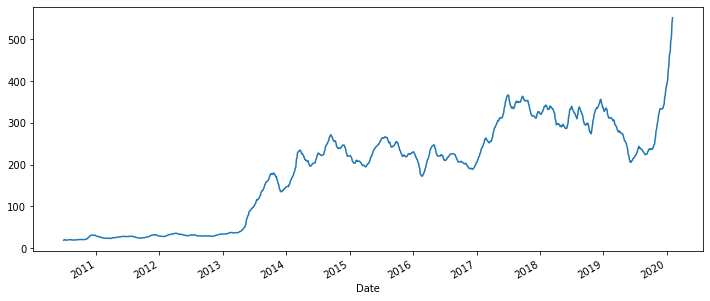

In [17]:
data['EMA_0.1'].plot(figsize=(12,5))

<AxesSubplot:xlabel='Date'>

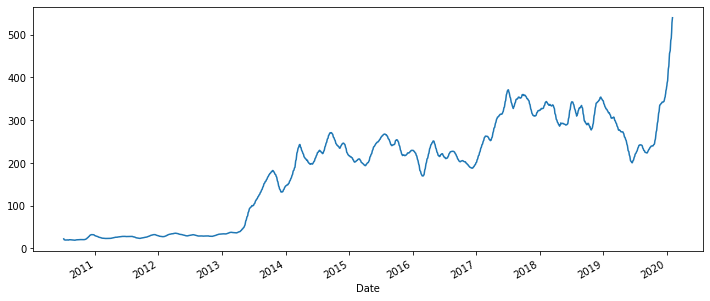

In [18]:
data['Open:20 days rolling'].plot(figsize=(12,5))